In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\minal\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load datasets
file_paths = [
    'Lillehammer 1994 Olympics Nations Medals.csv',
    'Atlanta 1996 Olympics Nations Medals.csv',
    'Nagano 1998 Olympics Nations Medals.csv',
    'Sydney 2000 Olympics Nations Medals.csv',
    'SaltLakeCity 2002 Olympics Nations Medals.csv',
    'Athens 2004 Olympics Nations Medals.csv',
    'Torino 2006 Olympics Nations Medals.csv',
    'Vancouver 2010 Olympics Nations Medals.csv',
    'London 2012 Olympics Nations Medals.csv',
    'Sochi 2014 Olympics Nations Medals.csv',
    'Rio 2016 Olympics Nations Medals.csv',
    'PyeongChang 2018 Olympics Nations Medals.csv',
    'Tokyo 2020 Olympics Nations Medals.csv',
    'beijing_2022_Olympics_Nations_Medals.csv',
    'Paris 2024 Olympics Nations Medals.csv'
]

dfs = [pd.read_csv(file) for file in file_paths]

In [3]:
# Add a column for year
years = [1994, 1996, 1998, 2000, 2002, 2004, 2006, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2024]
for df,year in zip(dfs,years):
    df['Year'] = year

In [4]:
# Combine all dataframes into one
olympics_df = pd.concat(dfs, ignore_index=True)

In [5]:
# Display the first few rows of the combined dataframe
olympics_df.head()

,NOC,Gold,Silver,Bronze,Total,Year
0,RUS,11,8,4,23,1994
1,NOR,10,11,5,26,1994
2,GER,9,7,8,24,1994
3,ITA,7,5,8,20,1994
4,USA,6,5,2,13,1994


In [6]:
olympics_df.tail()

,NOC,Gold,Silver,Bronze,Total,Year
791,PUR,0,0,2,2,2024
792,CIV,0,0,1,1,2024
793,EOR,0,0,1,1,2024
794,QAT,0,0,1,1,2024
795,SGP,0,0,1,1,2024


In [7]:
olympics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     796 non-null    object
 1   Gold    796 non-null    int64 
 2   Silver  796 non-null    int64 
 3   Bronze  796 non-null    int64 
 4   Total   796 non-null    int64 
 5   Year    796 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 37.4+ KB


In [8]:
olympics_df.describe()

,Gold,Silver,Bronze,Total,Year
count,796.000000,796.000000,796.000000,796.000000,796.000000
mean,3.574121,3.572864,3.940955,11.087940,2010.454774
std,6.280911,5.532156,5.505426,16.558106,9.678048
min,0.000000,0.000000,0.000000,1.000000,1994.000000
25%,0.000000,0.750000,1.000000,2.000000,2000.000000
50%,1.000000,2.000000,2.000000,5.000000,2012.000000
75%,4.000000,4.000000,5.000000,13.000000,2020.000000
max,48.000000,44.000000,42.000000,126.000000,2024.000000


In [9]:
# Checking for missing values and data types:
print(olympics_df.isnull().sum())

NOC       0
Gold      0
Silver    0
Bronze    0
Total     0
Year      0
dtype: int64


In [10]:
olympics_df.shape

(796, 6)

In [11]:
print(olympics_df[(olympics_df['NOC']=='USA') & (olympics_df['Year']==2024)])

     NOC  Gold  Silver  Bronze  Total  Year
701  USA    40      44      42    126  2024


In [12]:
print(olympics_df[(olympics_df['NOC']=='IND') & (olympics_df['Year']==2024)])

     NOC  Gold  Silver  Bronze  Total  Year
770  IND     0       1       5      6  2024


In [ ]:
olympics_df.to_csv('combined_data.csv', index=False)

# Gold Medal Distribution in Total

<AxesSubplot:xlabel='Gold', ylabel='Total'>

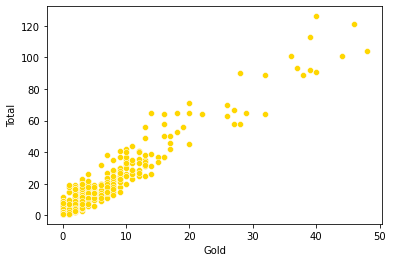

In [13]:
sns.scatterplot(x='Gold', y='Total', data=olympics_df, color='gold')

# Silver Medal Distribution in Total

<AxesSubplot:xlabel='Silver', ylabel='Total'>

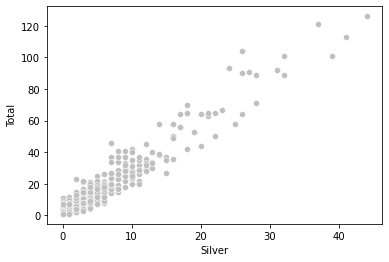

In [14]:
sns.scatterplot(x='Silver', y='Total', data=olympics_df, color='silver')

# Bronze Medal Distribution in Total

<AxesSubplot:xlabel='Bronze', ylabel='Total'>

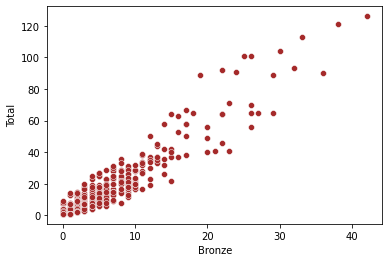

In [15]:
sns.scatterplot(x='Bronze', y='Total', data=olympics_df, color='brown')

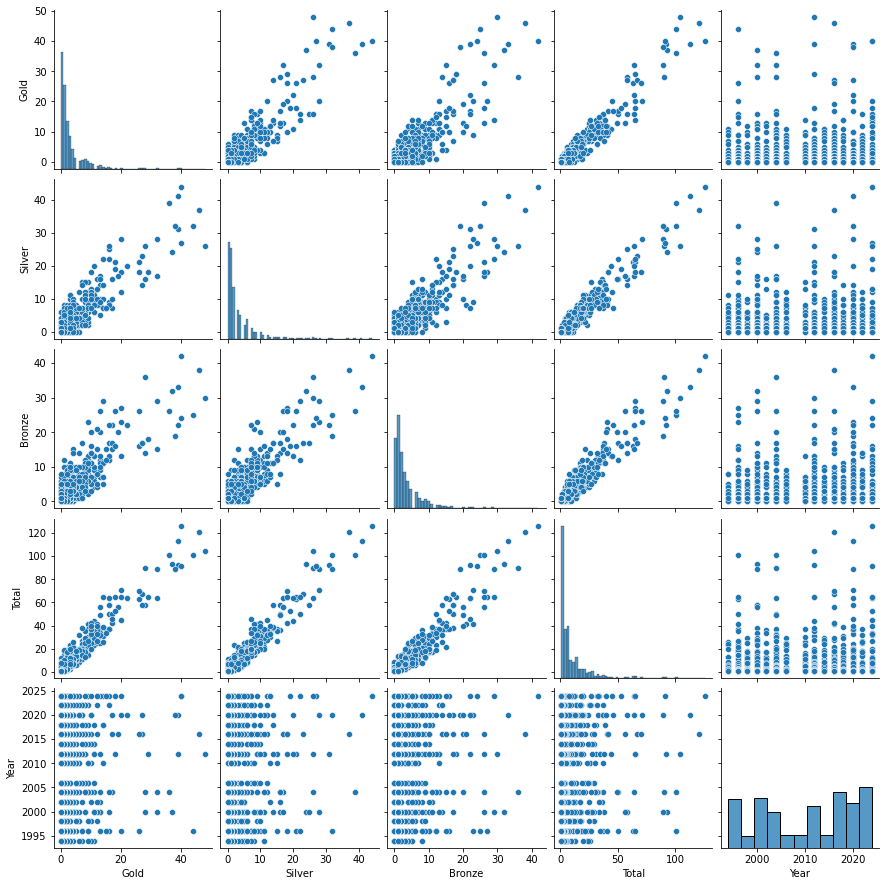

In [16]:
sns.pairplot(data=olympics_df)

# Medal Distribution Over the Years

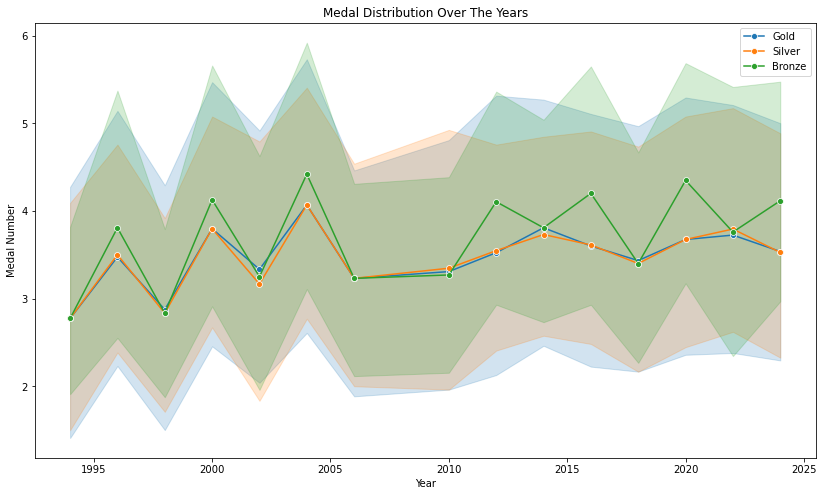

In [17]:
plt.figure(figsize=(14,8))
sns.lineplot(data=olympics_df, x='Year', y='Gold', label='Gold', marker='o')
sns.lineplot(data=olympics_df, x='Year', y='Silver', label='Silver', marker='o')
sns.lineplot(data=olympics_df, x='Year', y='Bronze', label='Bronze', marker='o')
plt.title('Medal Distribution Over The Years')
plt.xlabel('Year')
plt.ylabel('Medal Number')
plt.legend()
plt.show()

# Top Performing Nations

In [18]:
top_nations = olympics_df.groupby('NOC').sum().sort_values(by='Total', ascending=False).head(10)
top_nations

,Gold,Silver,Bronze,Total,Year
NOC,,,,,
USA,356,315,286,957,30136
CHN,241,192,155,588,30136
GER,184,188,179,551,30136
RUS,170,151,162,483,22052
FRA,111,124,135,370,30136
GBR,118,113,122,353,30136
ITA,98,100,134,332,30136
AUS,99,109,123,331,30136
CAN,93,100,121,314,30136


<Figure size 1008x576 with 0 Axes>

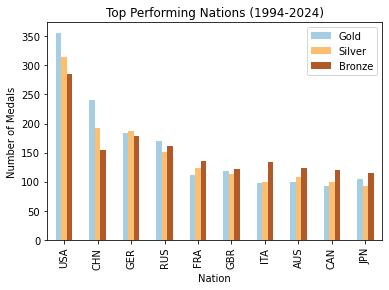

In [19]:
# Plot the top performing nations
plt.figure(figsize=(14, 8))
top_nations[['Gold', 'Silver', 'Bronze']].plot(kind='bar',colormap='Paired')
plt.title('Top Performing Nations (1994-2024)')
plt.xlabel('Nation')
plt.ylabel('Number of Medals')
plt.legend()
plt.show()

In [20]:
top_nations = pd.DataFrame(top_nations)
print(top_nations)

     Gold  Silver  Bronze  Total   Year
NOC                                    
USA   356     315     286    957  30136
CHN   241     192     155    588  30136
GER   184     188     179    551  30136
RUS   170     151     162    483  22052
FRA   111     124     135    370  30136
GBR   118     113     122    353  30136
ITA    98     100     134    332  30136
AUS    99     109     123    331  30136
CAN    93     100     121    314  30136
JPN   105      93     115    313  30136


In [21]:
print(top_nations.columns)

Index(['Gold', 'Silver', 'Bronze', 'Total', 'Year'], dtype='object')


In [22]:
top_nations = top_nations.reset_index()
top_nations.rename(columns={'index': 'NOC'}, inplace=True)

In [23]:
print(top_nations.head())

   NOC  Gold  Silver  Bronze  Total   Year
0  USA   356     315     286    957  30136
1  CHN   241     192     155    588  30136
2  GER   184     188     179    551  30136
3  RUS   170     151     162    483  22052
4  FRA   111     124     135    370  30136


# Total number of medals won by each country over the years

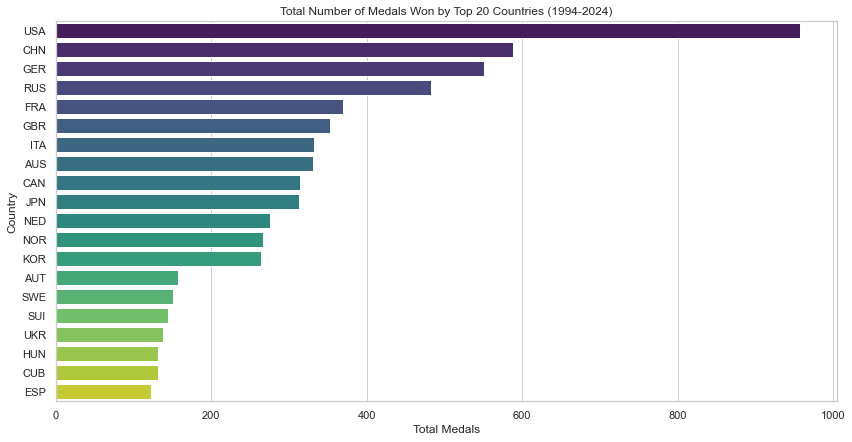

In [24]:
sns.set(style="whitegrid")

total_medals_by_country = olympics_df.groupby('NOC')['Total'].sum().reset_index().sort_values(by='Total', ascending=False)

plt.figure(figsize=(14, 7))
sns.barplot(x='Total', y='NOC', data=total_medals_by_country.head(20), palette='viridis')
plt.title('Total Number of Medals Won by Top 20 Countries (1994-2024)')
plt.xlabel('Total Medals')
plt.ylabel('Country')
plt.show()

In [25]:
print(total_medals_by_country)

     NOC  Total
133  USA    957
22   CHN    588
49   GER    551
108  RUS    483
45   FRA    370
..   ...    ...
85   MNE      1
90   NIG      1
94   PAK      1
95   PAN      1
0    AFG      1

[140 rows x 2 columns]


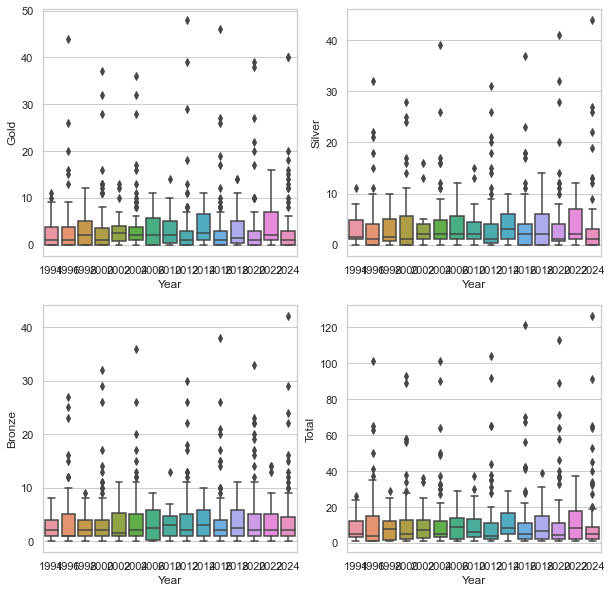

In [26]:
def graph(y):
    sns.boxplot(x="Year", y=y, data=olympics_df) 

plt.figure(figsize=(10,10)) 

plt.subplot(221) 
graph('Gold')

plt.subplot(222) 
graph('Silver')

plt.subplot(223) 
graph('Bronze')

plt.subplot(224) 
graph('Total')

plt.show()

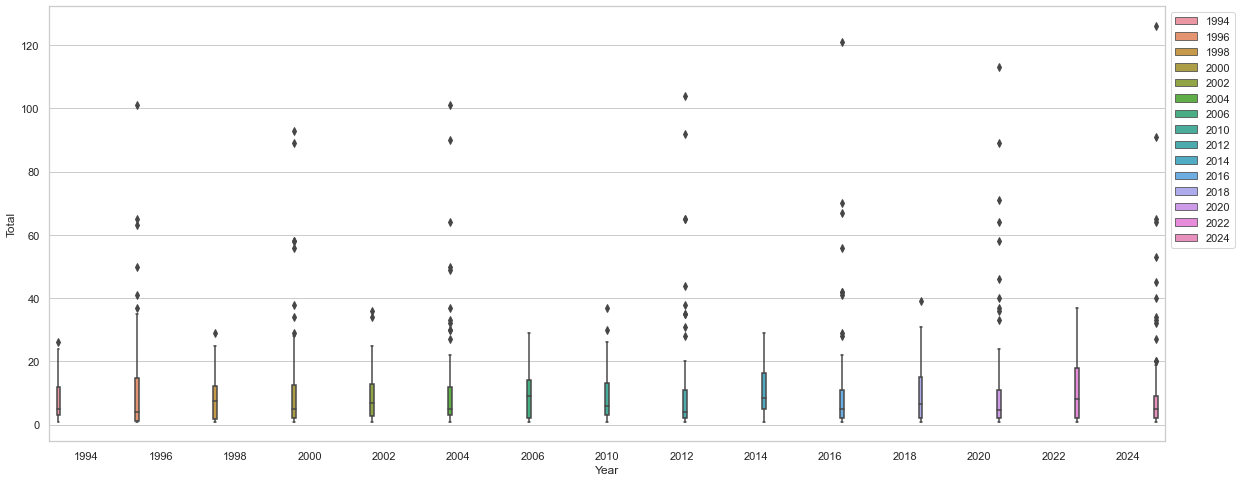

In [40]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Year', y='Total', hue='Year', data=olympics_df)
plt.legend(bbox_to_anchor=(1,1), loc=2)

# Correlation Analysis

In [41]:
# If there is any correlation between gold, silver and bronze medals?
numeric_df = olympics_df[['Gold','Silver','Bronze','Total','Year']]
correlation_matrix = numeric_df.corr()
correlation_matrix

,Gold,Silver,Bronze,Total,Year
Gold,1.000000,0.892787,0.849169,0.959952,0.007618
Silver,0.892787,1.000000,0.870678,0.962255,0.009130
Bronze,0.849169,0.870678,1.000000,0.945501,0.030298
Total,0.959952,0.962255,0.945501,1.000000,0.016014
Year,0.007618,0.009130,0.030298,0.016014,1.000000


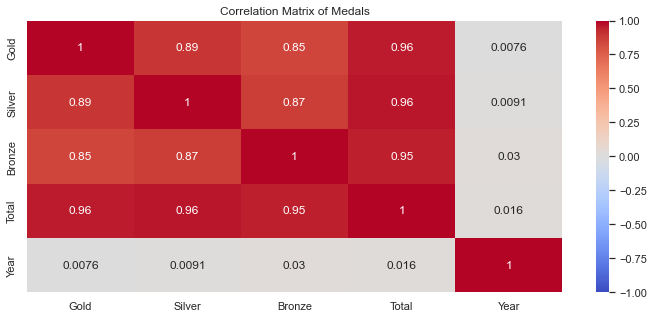

In [42]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Medals')
plt.show()

# Count of Gold, Silver and Bronze Medals

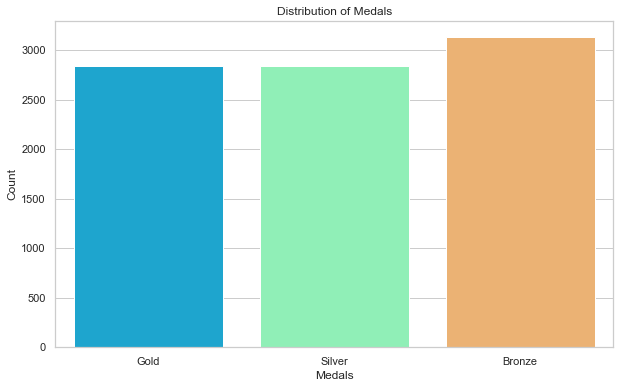

In [43]:
medal_count = olympics_df[['Gold','Silver','Bronze']].sum().reset_index()
medal_count.columns = ['Medal','Count']

plt.figure(figsize=(10,6))
sns.barplot(x='Medal', y='Count', data=medal_count, palette='rainbow')
plt.title('Distribution of Medals')
plt.xlabel('Medals')
plt.ylabel('Count')
plt.show()

In [44]:
print(medal_count)

    Medal  Count
0    Gold   2845
1  Silver   2844
2  Bronze   3137


# Distribution of Medals Over the Years

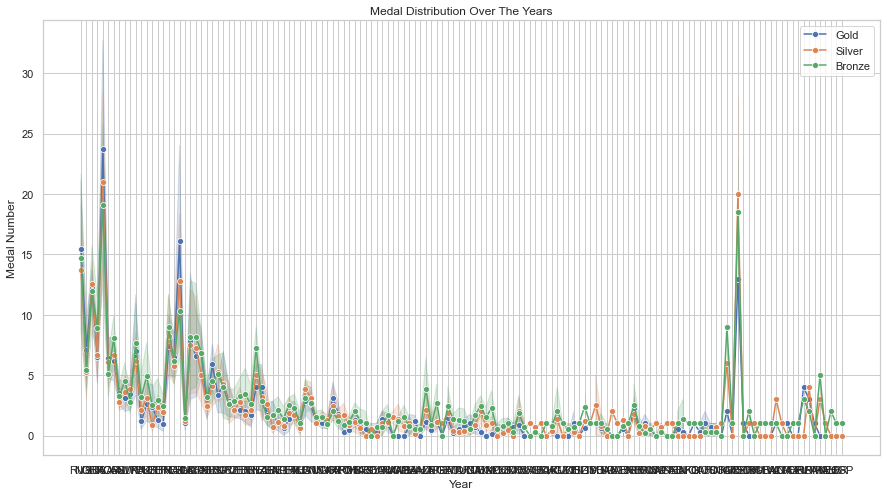

In [45]:
plt.figure(figsize=(15,8))
sns.lineplot(data=olympics_df, x='NOC', y='Gold', label='Gold', marker='o')
sns.lineplot(data=olympics_df, x='NOC', y='Silver', label='Silver', marker='o')
sns.lineplot(data=olympics_df, x='NOC', y='Bronze', label='Bronze', marker='o')
plt.title('Medal Distribution Over The Years')
plt.xlabel('Year')
plt.ylabel('Medal Number')
plt.legend()
plt.show()

# Extra (Predicting further)

# Predicting Medal Counts

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = olympics_df[['Gold', 'Silver', 'Bronze']]
y = olympics_df['Total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(1.2848448734270789e-28, 1.0)

In [48]:
print(y_pred)

[  2.   1.   4.   2.   2.   2.   9.  17.   2.   4.   3.   4.   4.   2.
   1.   4.  22.   3.  13.   5.   1.   1.   2.  12.   2.  23.   8.   5.
   8.   2.   8.   3.   1.   2.   7.  63.   1.  11.   1.  25.  13.   5.
   1.   9.  20.   4.   1.   1.   6.  19.   3.  10.   4.  24.  16.  19.
  11.   8.   1.   3.   4.  28.   2. 121.  37.   1.   4.   5.  65.   1.
   1.   2.   2.  21.  27.   1.   1.   2.  15.   6.   7.  14.   1.   2.
   7.   3.   9.   3.   9.   1.  11.  27.  17.   7.   4.   1.  33.   1.
   5.   3.   3.  29.   1.   2.   2.  36.   1.   4.  11.   8.   1.   8.
   1.   5.  11.  12.   1.  13.  13.  30.  11.   5.   1.  19.   7.   7.
   1.  25.   8.   8.   1.  34.   2.   1.   2.   2.  26.   2.   1.  15.
   8.   2.  11.   3.   9.  89.  25.   1.   1.  14.  37.  24.  20.   3.
   1.  37.   1.   2.   2.  35.]


In [49]:
# Geting the index of the first country in the test set:
first_index = X_test.index[0]

# Find the corresponding country name
first_country = olympics_df.loc[first_index, 'NOC']
print(f"The first country in the test set is: {first_country}")

The first country in the test set is: CZE


In [54]:
second_index = X_test.index[1]
third_index = X_test.index[2]
seventh_index = X_test.index[7]
sixthree_index = X_test.index[63]

# Find the corresponding country names
second_country = olympics_df.loc[second_index, 'NOC']
third_country = olympics_df.loc[third_index, 'NOC']
seventh_country = olympics_df.loc[seventh_index, 'NOC']
sixthree_country = olympics_df.loc[sixthree_index, 'NOC']

print(f"The second country in the test set is: {second_country}")
print(f"The third country in the test set is: {third_country}")
print(f"The seventh country in the test set is: {seventh_country}")
print(f"The sixty-third country in the test set is: {sixthree_country}")

The second country in the test set is: CPV
The third country in the test set is: INA
The seventh country in the test set is: ITA
The sixty-third country in the test set is: USA
